In [17]:
import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/[원천]화재씬')
fplist = os.listdir('.')
fp = random.sample(fplist,3000)

os.chdir('..')
src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/[원천]화재씬/'
dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/fire_img/'
for f in fp:
    shutil.move(src+f, dir+f)



In [18]:
import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/zero_img')
fplist = os.listdir('.')
for f in fplist:
    ff = f.split('.')[0]
    with open(f"C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/zero_label/{ff}.txt", "w") as make_file:
        make_file.close()




In [ ]:
import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/[원천]화재씬_10')
fplist = os.listdir('.')
fp = random.sample(fplist,3000)

os.chdir('..')
src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/[원천]무관씬/'
dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/zero_img/'
for f in fp:
    shutil.move(src+f, dir+f)



In [ ]:
!python detect.py --weights ./runs/train/yolov5s_real/weights/last.pt --source burn.mp4 --conf-thres 0.001

In [ ]:
!python detect.py --weights ./runs/train/yolov5s_real/weights/best.pt --source burn.mp4 --conf-thres 0.011

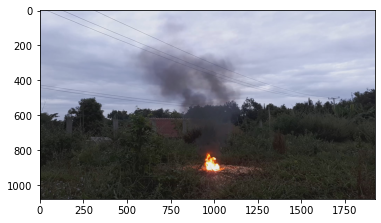

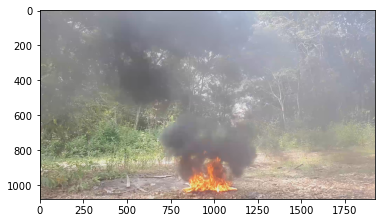

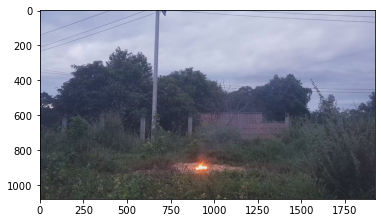

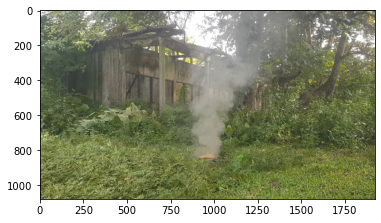

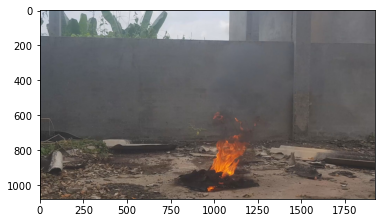

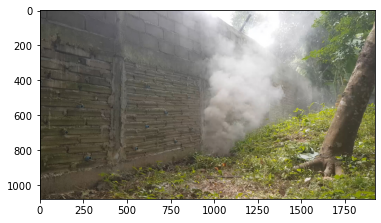

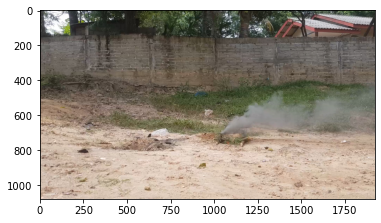

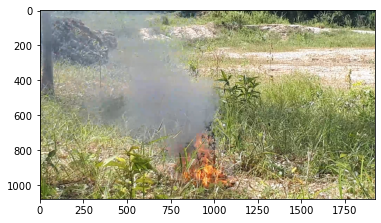

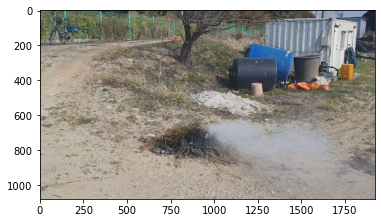

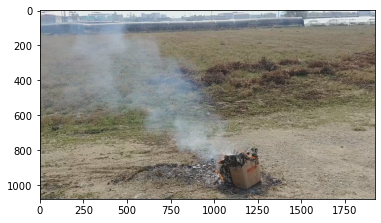

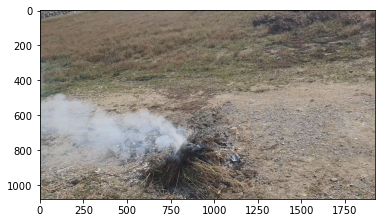

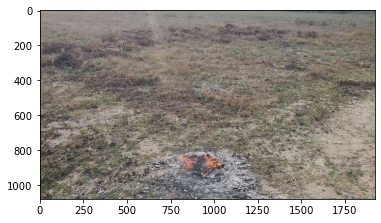

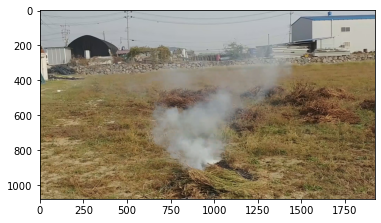

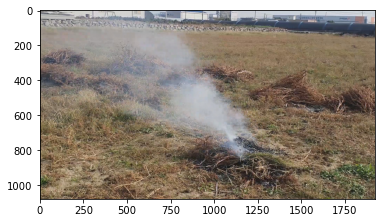

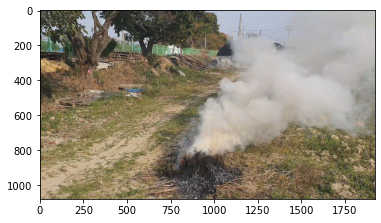

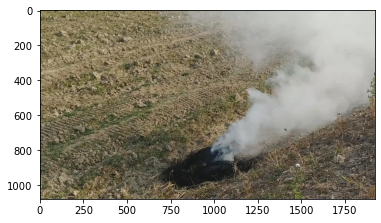

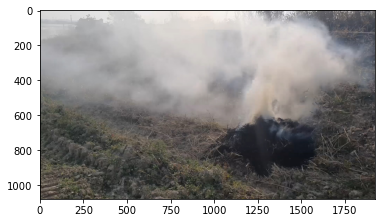

In [56]:
# 화재씬_.zip에서 카테고리별로 50개씩 뽑아서 more_fire에 저장

import os
import json
import random
import shutil
from collections import OrderedDict

import matplotlib.image as Image
import matplotlib.pyplot as plt

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/[원천]화재씬_8')
fplist = os.listdir('.')
os.chdir('..') # 내 위치: training

catlist = []
src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/[원천]화재씬_8/'
dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/'

for f in fplist:
    catnum = f.split('MF')[0].split('N')[-1]
    if catnum not in catlist:
        catlist.append(catnum)
        os.mkdir(catnum)
        shutil.move(src+f, dir+catnum+'/'+f)
    else:
        shutil.move(src+f, dir+catnum+'/'+f)

# 50개 뽑아서 옮기기 + 폴더삭제

dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/more_fire/'

for cat in catlist:
    os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/' + cat)
    slicelist = os.listdir('.')
    os.chdir('..') # 내 위치: training
    src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/' + cat+ '/'
    slices = random.sample(slicelist,50)

    # 하나 보여줘
    img = Image.imread(src+slices[25])
    plt.imshow(img)
    plt.show()

    for slice in slices:
        shutil.move(src+slice, dir+slice)    
    
    #shutil.rmtree(rf'{cat}')
                

In [57]:
# 레이블 모음([라벨]화재씬)에서 해당 이미지(more_fire) 레이블 꺼내오기(to fire_json_label)

import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/more_fire')
fplist = os.listdir('.')

new_list = []
for tmp in fplist:
    new_list.append(tmp.split('.')[0]+'.json')

os.chdir('..')
src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/[라벨]화재씬/'
dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/fire_json_label/'
for f in new_list:
    shutil.move(src+f, dir+f)

In [58]:
# fire json --> yolo format .txt

import os
import json
from collections import OrderedDict

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/fire_json_label')
for fp in os.listdir('.'):
    with open(fp, "rt", newline='', encoding="utf-8-sig") as f:
        contents = f.read()
        json_data = json.loads(contents)
        key_img = json_data["image"]
        fn = key_img["filename"]
        file_name = fn.split('.')[0]
        img_w = key_img["resolution"][0]
        img_h = key_img["resolution"][1]
        dw = 1/img_w
        dh = 1/img_h

        key_annot = json_data["annotations"]
        with open(f"C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/fire_txt_label/{file_name}.txt", "w") as make_file:
            for i in range(len(key_annot)):
                class_id = int(key_annot[i]["class"]) - 1 # yolo는 0부터 시작
                if "box" in key_annot[i]: # bbox
                    key_box = key_annot[i]["box"]
                    xmin = key_box[0]
                    ymin = key_box[1]
                    xmax = key_box[2]
                    ymax = key_box[3]
                    x = (xmin + xmax)/2.0
                    y = (ymin + ymax)/2.0
                    w = xmax - xmin
                    h = ymax - ymin
                    x = x*dw
                    w = w*dw
                    y = y*dh
                    h = h*dh
                    make_file.write(f"{class_id} {x} {y} {w} {h}\n")
                else: # seg
                    key_poly = key_annot[i]["polygon"]
                    xlist=[]
                    ylist=[]
                    for j in key_poly:
                        if len(j) == 2:
                            xlist.append(j[0])
                            ylist.append(j[1])
                    xmin = min(xlist)
                    xmax = max(xlist)
                    ymin = min(ylist)
                    ymax = max(ylist)
                    x = (xmin + xmax)/2.0
                    y = (ymin + ymax)/2.0
                    w = xmax - xmin
                    h = ymax - ymin
                    x = x*dw
                    w = w*dw
                    y = y*dh
                    h = h*dh
                    make_file.write(f"{class_id} {x} {y} {w} {h}\n")
            make_file.close()
        f.close()

In [ ]:
import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/zero_img')
fplist = os.listdir('.')
for f in fplist:
    ff = f.split('.')[0]
    with open(f"C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/zero_label/{ff}.txt", "w") as make_file:
        make_file.close()




In [21]:
#os.mkdir('you')
#os.chdir('C:/Users/bypy/pypy')
#shutil.rmtree(r'you')

print(os.getcwd())


C:\Users\MEDICAL IT\Downloads\화재 발생 예측 영상\Training


In [ ]:
import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/pypy/yolov5/data/images/train/')
fplist = os.listdir('.')
file_list = [] 
for fname in fplist:
    file_list.append(fname.split('.')[0]+'.json')

os.chdir('..')
src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/[라벨]화재씬/'
dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Training/coco_json/'
for f in file_list:
    shutil.move(src+f, dir+f)


In [59]:
import os
import json
import random
import shutil
from collections import OrderedDict

os.chdir('C:/Users/bypy/pypy/yolov5/data/images/valid/')
fplist = os.listdir('.')
file_list = [] 
for fname in fplist:
    file_list.append(fname.split('.')[0]+'.json')

os.chdir('..')
src = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/[라벨]1.화재씬/'
dir = 'C:/Users/bypy/Downloads/화재 발생 예측 영상/Validation/coco_json/'
for f in file_list:
    shutil.move(src+f, dir+f)


In [62]:
f = 'fddn541560mn456'
d = f.split('n')[1].split('m')[0]
print(d)

541560
